# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statistics import mode
from better_profanity import profanity

In [2]:
from convokit import Corpus, download
wiki_awry_corpus = Corpus(filename=download('conversations-gone-awry-corpus'))
wiki_talk_corpus = Corpus(filename=download('wiki-corpus'))
reddit_corpus = Corpus(filename=download("reddit-corpus-small"))
reddit_awry_corpus = Corpus(filename=download("conversations-gone-awry-cmv-corpus"))

Dataset already exists at /Users/administrator/.convokit/downloads/conversations-gone-awry-corpus
Dataset already exists at /Users/administrator/.convokit/downloads/wiki-corpus
Dataset already exists at /Users/administrator/.convokit/downloads/reddit-corpus-small
Dataset already exists at /Users/administrator/.convokit/downloads/conversations-gone-awry-cmv-corpus


In [3]:
corpora = {
  'wiki_talk': wiki_talk_corpus,
  'wiki_awry': wiki_awry_corpus,
  'reddit': reddit_corpus,
  'reddit_awry': reddit_awry_corpus
}

print('SUMMARIES')
print('--------------')
print('WIKIPEDIA TALK PAGES CORPUS')
wiki_talk_corpus.print_summary_stats()
print('--------------')

print('WIKIPEDIA - CONVERSATIONS GONE AWRY CORPUS')
wiki_awry_corpus.print_summary_stats()
print('--------------')

print('REDDIT CORPUS')
reddit_corpus.print_summary_stats()
print('--------------')

print('REDDIT - CONVERSATIONS GONE AWRY CORPUS')
reddit_awry_corpus.print_summary_stats()

SUMMARIES
--------------
WIKIPEDIA TALK PAGES CORPUS
Number of Speakers: 38462
Number of Utterances: 391294
Number of Conversations: 125292
--------------
WIKIPEDIA - CONVERSATIONS GONE AWRY CORPUS
Number of Speakers: 8069
Number of Utterances: 30021
Number of Conversations: 4188
--------------
REDDIT CORPUS
Number of Speakers: 119889
Number of Utterances: 297132
Number of Conversations: 8286
--------------
REDDIT - CONVERSATIONS GONE AWRY CORPUS
Number of Speakers: 9548
Number of Utterances: 42964
Number of Conversations: 6842


## Conversation features

- **id**: id of the conversation
- **utterances**: ids of utterances in the conversation (in order I presume)
- **meta**: conversation metadata
    - **page_title**: title of page under which conversation is occurring
    - **page_id**: unique numerical id of the talk page
    - **pair_id**: the id of the conversation that this comment's conversation is paired with
    - **conversation_has_personal_attack**: whether any comment in this comment's conversation contains a personal attack
    - **verified**: whether the personal attack label has been verified by an internal annotator
    - **pair_verified**: whether the personal attack label has been double checked by the internal annotator
    - **annotation_year**: self explanatory
    - **split**: (train, test, or val) whether this conversation was used as train, test, or val in "Trouble on the Horizon"


## Utterance features
- **id**: index of the utterance
- **conversation_id**: id of the first utterance in the converstaion this utterance belongs to
- **reply-to**: index of the utterance to which this utterance replies to (None if not a reply)
- **speaker**: the speaker who authored the utterance
- **timestamp**: timestamp of utterance
- **text**: textual content of the utterance
- **meta**: metadata for each utterance
    - **is_section_header**: whether the utterance is a conversation "title" or "subject" (if true, the utterance should be ignored)
    - **comment_has_personal_attack**: whether this comment was judged by 3 crowdsourced annotators to contain a personal comment_has_personal_attack
    - **parsed**: SpaCy parsed version of the utterance text
        - **rt**: ??
        - **toks**: List of parsed tokens
            - **tok**: the token (word, punctuation, etc.)
            - **tag**: Detailed part of speech tag
            - **dep**: syntactic dependency, i.e. the relation between the tokens
            - **up**: list related to dn, not sure how
            - **dn**: list related to up, not sure how

## Structure of Convos

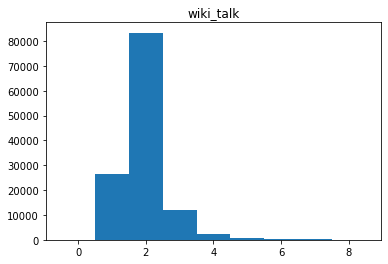

Mean: 1.9668693930977237
Median: 1
Mode: 2
Min: 1
Max: 57


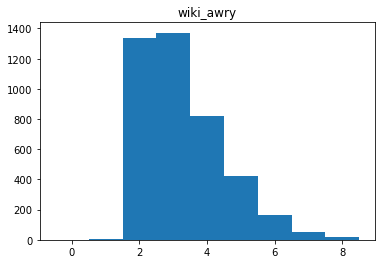

Mean: 3.266714422158548
Median: 2
Mode: 3
Min: 1
Max: 9


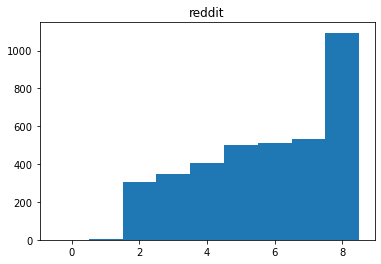

Mean: 19.6282886797007
Median: 13
Mode: 8
Min: 1
Max: 913


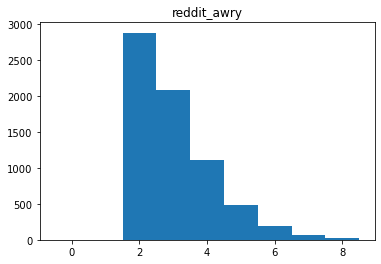

Mean: 3.0192926045016075
Median: 2
Mode: 2
Min: 1
Max: 9


In [4]:
def speakers_per_convo(corpus_name):
    corpus = corpora[corpus_name]
    counts = []
    for convo in corpus.iter_conversations():
        counts.append(len(convo.get_speaker_ids()))

    plt.hist(counts, bins=range(10), align='left')
    plt.title(corpus_name)
    plt.show()
    
    print('Mean: ' +  str(sum(counts) / len(counts)))
    print('Median: ' +  str(counts[len(counts) // 2]))
    print('Mode: ' +  str(mode(counts)))
    print('Min: ' +  str(min(counts)))
    print('Max: ' +  str(max(counts)))
    
for c in corpora:
    speakers_per_convo(c)

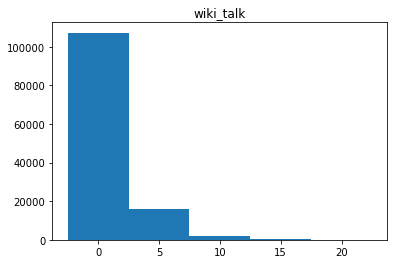

Mean: 3.1230565399227403
Median: 2
Mode: 2
Min: 2
Max: 59


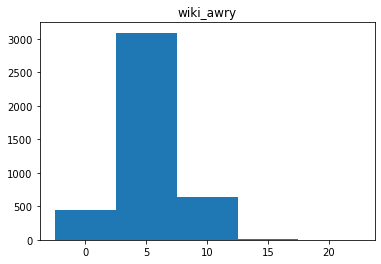

Mean: 7.168338108882521
Median: 7
Mode: 6
Min: 3
Max: 20


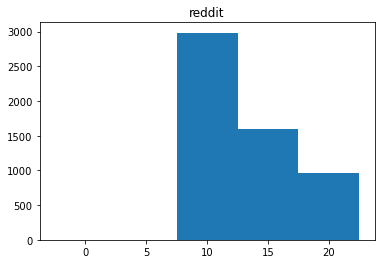

Mean: 35.85952208544533
Median: 15
Mode: 11
Min: 11
Max: 1482


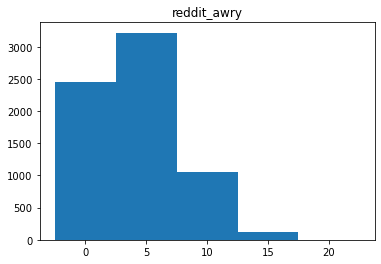

Mean: 6.279450453083894
Median: 2
Mode: 4
Min: 2
Max: 22


In [5]:
def utterances_per_convo(corpus_name):
    corpus = corpora[corpus_name]
    counts = []
    for convo in corpus.iter_conversations():
        counts.append(len(convo.get_utterance_ids()))
        
    plt.hist(counts, bins=range(0, 30, 5), align='left')
    plt.title(corpus_name)
    plt.show()
    
    print('Mean: ' +  str(sum(counts) / len(counts)))
    print('Median: ' +  str(counts[len(counts) // 2]))
    print('Mode: ' +  str(mode(counts)))
    print('Min: ' +  str(min(counts)))
    print('Max: ' +  str(max(counts)))
    
for c in corpora:
    utterances_per_convo(c)

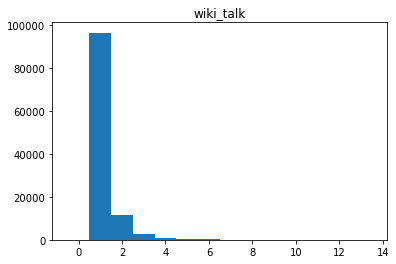

Mean: 1.2057595956180085
Median: 2
Mode: 1
Min: 1
Max: 53
Errors: 12923


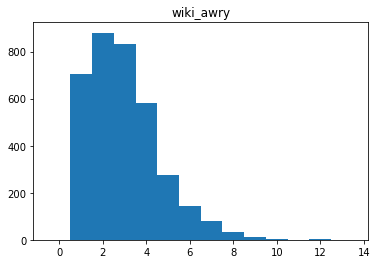

Mean: 2.964778810932657
Median: 3
Mode: 2
Min: 1
Max: 12
Errors: 639


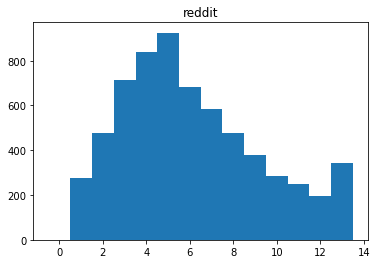

Mean: 15.741853729181752
Median: 7
Mode: 5
Min: 1
Max: 911
Errors: 0


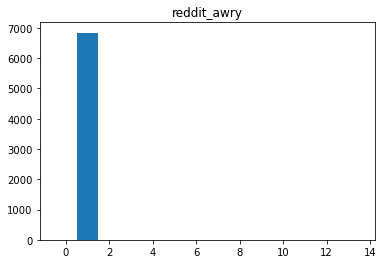

Mean: 1.0
Median: 1
Mode: 1
Min: 1
Max: 1
Errors: 0


In [6]:
def paths_per_convo(corpus_name):
    corpus = corpora[corpus_name]
    counts = []
    error_count = 0
    for convo in corpus.iter_conversations():
        try: 
            counts.append(len(convo.get_root_to_leaf_paths()))
        except ValueError as e:
            error_count += 1
        
    plt.hist(counts, bins=range(15), align='left')
    plt.title(corpus_name)
    plt.show()
    
    print('Mean: ' +  str(sum(counts) / len(counts)))
    print('Median: ' +  str(counts[len(counts) // 2]))
    print('Mode: ' +  str(mode(counts)))
    print('Min: ' +  str(min(counts)))
    print('Max: ' +  str(max(counts)))
    print('Errors: ' +  str(error_count))
    
for c in corpora:
    paths_per_convo(c)

In [7]:
# We want to consider conversations with a call-reply structure between two speakers, having at least five utterances
def detect_interlocution(conv, min_utts, print=False):
    '''
    Finds whether the conversation has a call-reply structure between two speakers with at least min_utts utterances

    ~~~~~~~~~~~ ARGUMENTS ~~~~~~~~~~~
        > conv - entire conversation object
        > min_utts - the minimum number of utterances that constitute a valid conversation
        > print - whether or not to print why the conversation was rejected
    ~~~~~~~~~~~~ RETURNS ~~~~~~~~~~~~
        > bool representing whether or not the conversation's longest path has the aforementioned structure
    '''
    # At the moment, only considering first longest path if there are multiple # TODO: Add functionality to examine all paths
    try:
        longest_path = conv.get_longest_paths()[0]
    except ValueError as v:
        if print:
            print(v)
            print('skipping...')
        return False
    
    if len(longest_path) < min_utts:
        if print:
            print('Less than {} utterances in conversation\nskipping...'.format(min_utts))
        return False

    speakers = []

    for utt in longest_path:
        speakers.append(utt.get_speaker().id)
    
    if len(set(speakers)) > 2:
        if print:
            print('More than 2 speakers in conversation\nskipping...')
        return False

    return True

for name, corpus in corpora.items():
    # Determine number of valid conversations
    num_valid = 0
    valid_conv_ids = []  # Will hold IDs of all valid converations
    for conv in corpus.iter_conversations():
        if detect_interlocution(conv, 5):
            valid_conv_ids.append(conv.id)
            num_valid += 1
    print(name)
    print('({}/{}) {:.1f}% conversations valid'.format(num_valid, len(corpus.get_conversation_ids()), num_valid*100/len(corpus.get_conversation_ids())))
    print(('-----------'))

wiki_talk
(6577/125292) 5.2% conversations valid
-----------
wiki_awry
(637/4188) 15.2% conversations valid
-----------
reddit
(595/8286) 7.2% conversations valid
-----------
reddit_awry
(1224/6842) 17.9% conversations valid
-----------


In [8]:
# We want to consider conversations with a call-reply structure between two speakers, having at least five utterances
def detect_interlocution(conv, min_utts, longest, print=False):
    '''
    Finds whether the conversation has a call-reply structure between two speakers with at least min_utts utterances

    ~~~~~~~~~~~ ARGUMENTS ~~~~~~~~~~~
        > conv - entire conversation object
        > min_utts - the minimum number of utterances that constitute a valid conversation
        > print - whether or not to print why the conversation was rejected
    ~~~~~~~~~~~~ RETURNS ~~~~~~~~~~~~
        > bool representing whether or not the conversation's longest path has the aforementioned structure
    '''
    try:
        if longest:
            paths = conv.get_longest_paths()
        else:
            paths = conv.get_root_to_leaf_paths()
    except ValueError as v:
        if print:
            print(v)
            print('skipping...')
        return False
    
    num_valid = 0
    for path in paths:
        if len(path) < min_utts:
            if print:
                print('Less than {} utterances in conversation\nskipping...'.format(min_utts))
            continue

        speakers = []

        for utt in path:
            speakers.append(utt.get_speaker().id)

        if len(set(speakers)) > 2:
            if print:
                print('More than 2 speakers in conversation\nskipping...')
            continue
        num_valid += 1

    return num_valid

print('ALL LONGEST PATHS')
for name, corpus in corpora.items():
    # Determine number of valid conversations
    num_valid = 0
    num_convos_valid = 0
    valid_conv_ids = []  # Will hold IDs of all valid converations
    for conv in corpus.iter_conversations():
        result = detect_interlocution(conv, 5, True)
        if result:
            valid_conv_ids.append(conv.id)
            num_valid += result
            num_convos_valid += 1

    print(name)
    print('{} utterances valid'.format(num_valid))
    print('------------')
    
print('---------------------')
print('---------------------')
print('---------------------')
print ('ALL ROOT TO LEAF PATHS:')
for name, corpus in corpora.items():
    # Determine number of valid conversations
    num_valid = 0
    valid_conv_ids = []  # Will hold IDs of all valid converations
    for conv in corpus.iter_conversations():
        result = detect_interlocution(conv, 5, False)
        if result:
            valid_conv_ids.append(conv.id)
            num_valid += result

    print(name)
    print('{} utterances valid'.format(num_valid,))
    print('------------')

ALL LONGEST PATHS
wiki_talk
6957 utterances valid
------------
wiki_awry
709 utterances valid
------------
reddit
700 utterances valid
------------
reddit_awry
1224 utterances valid
------------
---------------------
---------------------
---------------------
ALL ROOT TO LEAF PATHS:
wiki_talk
7517 utterances valid
------------
wiki_awry
782 utterances valid
------------
reddit
2231 utterances valid
------------
reddit_awry
1224 utterances valid
------------


In [9]:
from collections import Counter

# We want to consider conversations with a call-reply structure between two speakers, having at least five utterances
def detect_interlocution(conv, min_utts, print=False):
    '''
    Finds whether the conversation has a call-reply structure between two speakers with at least min_utts utterances

    ~~~~~~~~~~~ ARGUMENTS ~~~~~~~~~~~
        > conv - entire conversation object
        > min_utts - the minimum number of utterances that constitute a valid conversation
        > print - whether or not to print why the conversation was rejected
    ~~~~~~~~~~~~ RETURNS ~~~~~~~~~~~~
        > bool representing whether or not the conversation's longest path has the aforementioned structure
    '''
    # At the moment, only considering first longest path if there are multiple # TODO: Add functionality to examine all paths
    try:
        speakers = conv.get_chronological_speaker_list()
        op = speakers[0]
    except ValueError as v:
        if print:
            print(v)
            print('skipping...')
        return False
    
    num_valid = 0
    speaker_set = set(speakers)
    counts = Counter(speakers)
    
    if counts[op] < min_utts:
        return False 
    
    for speaker in speaker_set:
        if counts[speaker] >= min_utts:
            num_valid += 1
        
    return num_valid - 1

for name, corpus in corpora.items():
    # Determine number of valid conversations
    num_valid = 0
    valid_conv_ids = []  # Will hold IDs of all valid converations
    for conv in corpus.iter_conversations():
        if detect_interlocution(conv, 3):
            valid_conv_ids.append(conv.id)
            num_valid += 1
    print(name)
    print('({}/{}) {:.1f}% conversations valid'.format(num_valid, len(corpus.get_conversation_ids()), num_valid*100/len(corpus.get_conversation_ids())))
    print(('-----------'))

wiki_talk
(4921/125292) 3.9% conversations valid
-----------
wiki_awry
(1013/4188) 24.2% conversations valid
-----------
reddit
(1932/8286) 23.3% conversations valid
-----------
reddit_awry
(1352/6842) 19.8% conversations valid
-----------


In [10]:
def filter_pairwise(corpus, min_utt):
    pair_exchanges = corpus.directed_pairwise_exchanges(speaker_ids_only=True)
    length = len(pair_exchanges)

    count = 0
    for k, v in pair_exchanges.items():
        if len(v) >= min_utt:
            count += 1
    return count, length
    
    
for name, corpus in corpora.items():
    # Determine number of valid conversations
    num_valid = 0
    try:
        count, length = filter_pairwise(corpus, 5)
        print('({}/{}) {:.1f}% pairwise exchanges valid'.format(count, length, count*100/length))
        print(('-----------'))
    except KeyError as e:
        print('error with ' + name)
        print(('-----------'))

(7453/117930) 6.3% pairwise exchanges valid
-----------
error with wiki_awry
-----------
(3744/218902) 1.7% pairwise exchanges valid
-----------
(858/20956) 4.1% pairwise exchanges valid
-----------


In [11]:
for convo in wiki_awry_corpus.iter_conversations():
    c = convo
    try: 
        c.get_root_to_leaf_paths()
    except ValueError as e:
        break
print(c)

Conversation('id': '146743638.12652.12652', 'utterances': ['146743638.12652.12652', '146743638.12667.12652', '146842219.12874.12874', '146860774.13072.13072'], 'meta': {'page_title': 'User talk:2005', 'page_id': 1003212, 'pair_id': '143890867.11926.11926', 'conversation_has_personal_attack': False, 'verified': True, 'pair_verified': True, 'annotation_year': '2018', 'split': 'train'})


In [12]:
c.check_integrity()

Checking reply-to chain of Conversation 146743638.12652.12652


False

In [13]:
c.get_utterance_ids()

['146743638.12652.12652',
 '146743638.12667.12652',
 '146842219.12874.12874',
 '146860774.13072.13072']

In [14]:
c.get_utterances_dataframe()

,timestamp,text,speaker,reply_to,conversation_id,meta.is_section_header,meta.comment_has_personal_attack,meta.toxicity,meta.parsed
id,,,,,,,,,
146743638.12652.12652,1.1853e+09,== [WIKI_LINK: WP:COMMONNAME] ==\n,Sirex98,None,146743638.12652.12652,True,False,0,"[{'rt': 3, 'toks': [{'tok': '=', 'tag': 'NFP',..."
146743638.12667.12652,1.18528e+09,I notice that earier that moved wiki_link to ...,Sirex98,146743638.12652.12652,146743638.12652.12652,False,False,0.0781406,"[{'rt': 33, 'toks': [{'tok': 'I', 'tag': 'PRP'..."
146842219.12874.12874,1.18531e+09,"Chen was known in the poker world as ""William""...",2005,146743638.12667.12652,146743638.12652.12652,False,False,0.0317842,"[{'rt': 2, 'toks': [{'tok': 'Chen', 'tag': 'NN..."
146860774.13072.13072,1.18532e+09,I see what you saying I just read his pokersta...,Sirex98,146842696.12874.12874,146743638.12652.12652,False,False,0.030405,"[{'rt': 13, 'toks': [{'tok': 'I', 'tag': 'PRP'..."


# Other Exploration

## Comparing All Corpora

In [ ]:
def length_data(corpus):
    lengths = []
    for utt in corpus.iter_utterances():
        lengths.append(len(utt.text))
    return sum(lengths)/len(lengths), lengths[len(lengths)//2]

In [ ]:
averages = []
medians = []
for corpus in corpora:
    averages.append(length_data(corpora[corpus])[0])
    medians.append(length_data(corpora[corpus])[1])

In [ ]:
plt.title('Average Length of Comment')
plt.bar(corpora.keys(), averages)
plt.show()

In [ ]:
plt.title('Median Length of Comment')
plt.bar(corpora.keys(), medians)
plt.show()

In [ ]:
def profanity_percent(corpus):
    lst = []
    for i in range(1000):
        lst.append(profanity.contains_profanity(corpus.random_utterance().text))
    print('DONE')
    return sum(lst) / len(lst)

In [ ]:
profanities = []
for corpus in corpora:
    profanities.append(profanity_percent(corpora[corpus]))

In [ ]:
plt.title('Percent of Text With Profanity (random sample from each corpus)')
plt.bar(corpora.keys(), profanities)
plt.show()

## Exploring Reddit Corpora

In [ ]:
convos = reddit_corpus.get_conversations_dataframe()
convos.columns = convos.columns.str.replace('.','_')
convos.head()

In [ ]:
print(convos.meta_subreddit.value_counts())
convos.meta_subreddit.value_counts()[:10].plot.bar(title='Top 10 Subreddits in Reddit Corpus')
plt.show()

In [ ]:
reddit_utts = reddit_corpus.get_utterances_dataframe()
reddit_utts.columns = reddit_utts.columns.str.replace('.','_')
reddit_utts.head()

In [ ]:
reddit_awry_utts = reddit_awry_corpus.get_utterances_dataframe()
reddit_awry_utts.columns = reddit_awry_utts.columns.str.replace('.','_')
reddit_awry_utts.head()

In [ ]:
def meta_score_stats(utts):
    print('mean: ' + str(utts.meta_score.mean()))
    print('median: ' + str(utts.meta_score.median()))
    print('min: ' + str(utts.meta_score.min()))
    print('max: ' + str(utts.meta_score.max()))

print('Reddit Corpus - Scores')
meta_score_stats(reddit_utts)
print('-------------')
print('Reddit Awry Corpus - Scores')
meta_score_stats(reddit_awry_utts)

## Exploring Wiki Corpora

In [ ]:
convos = wiki_awry_corpus.get_conversations_dataframe()
convos.columns = convos.columns.str.replace('.','_')
convos.head()

In [ ]:
convos.meta_conversation_has_personal_attack.value_counts().plot.bar(title='Conversation Has Personal Attack')
plt.show()

In [ ]:
wiki_awry_utts = wiki_awry_corpus.get_utterances_dataframe()
wiki_awry_utts.columns = wiki_awry_utts.columns.str.replace('.','_')
wiki_awry_utts.head()

In [ ]:
wiki_talk_utts = wiki_talk_corpus.get_utterances_dataframe()
wiki_talk_utts.columns = wiki_talk_utts.columns.str.replace('.','_')
wiki_talk_utts.head()

In [ ]:
print('Has Personal Attack - Toxicity')
print(wiki_awry_utts[wiki_awry_utts.meta_comment_has_personal_attack].meta_toxicity.mean())
print('Does Not Have Personal Attack - Toxicity')
print(wiki_awry_utts[wiki_awry_utts.meta_comment_has_personal_attack == False].meta_toxicity.mean())